In [ ]:
 from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# import required module
from pathlib import Path

# get the path/directory
folder_dir = '/content/drive/MyDrive/data/CNN/1st_train/horizontal/'

# iterate over files in
# that directory
images = Path(folder_dir).glob('*.png')
for image in images:
	print(image)


In [ ]:
#reading the images from drive
# import the modules


import os
from os import listdir
a=[]
# get the path/directory
folder_dir ="/content/drive/MyDrive/data/CNN/lab_internals/1st_train/horizontal/"
for images in os.listdir(folder_dir):
  if (images.endswith(".png")):
    x=folder_dir+images
    a.append(cv2.imread(x))
horizontal=np.array(a)
a=[]
# get the path/directory
folder_dir ="/content/drive/MyDrive/data/CNN/lab_internals/1st_train/vertical/"
for images in os.listdir(folder_dir):
  if (images.endswith(".png")):
    x=folder_dir+images
    a.append(cv2.imread(x))
a=a[0:200]
vertical=np.array(a)




In [ ]:
# print the number of images in each class
print(len(horizontal))
print(len(vertical))

255
200


In [ ]:
# as we can see we have im-balance data set so we will Augment our data to make it balanced using Augmentor

In [ ]:
pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

# # Importing necessary library
# import Augmentor
# # Passing the path of the image directory
# p = Augmentor.Pipeline("/content/drive/MyDrive/data/CNN/lab_internals/1st_train/vertical/")
  
# # Defining augmentation parameters and generating 5 samples
# p.flip_left_right(0.5)
# p.black_and_white(0.1)
# p.rotate(0.3, 10, 10)
# p.skew(0.4, 0.5)
# p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
# p.sample(55)

Initialised with 241 image(s) found.
Output directory set to /content/drive/MyDrive/data/CNN/lab_internals/1st_train/vertical/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=L size=512x512 at 0x7F07B73261A0>: 100%|██████████| 55/55 [00:00<00:00, 57.48 Samples/s]


In [ ]:
#reading the augmented images
a=[]
folder_dir ="/content/drive/MyDrive/data/CNN/lab_internals/1st_train/vertical/output/"
for images in os.listdir(folder_dir):
  if (images.endswith(".png")):
    x=folder_dir+images
    a.append(cv2.imread(x))
vertical1=np.array(a)
print(len(vertical1))

55


In [ ]:
print(vertical1.shape)

(55, 512, 512, 3)


In [ ]:
vertical=np.concatenate((vertical, vertical1), axis=0)

In [ ]:
print(len(horizontal))
print(len(vertical))

255
255


In [ ]:
images = np.concatenate((horizontal, vertical), axis = 0)
print(images.shape)
label= np.concatenate((np.zeros(horizontal.shape[0]), np.ones(vertical.shape[0])), axis = 0)
print(label.shape)

(510, 512, 512, 3)
(510,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(images,label,test_size=0.20, random_state=42)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(images.shape[1], images.shape[2], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 flatten (Flatten)           (None, 984064)            0

In [ ]:
history = model.fit( X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
13/13 [==============================] - 194s 15s/step - loss: 17.4349 - accuracy: 0.9583 - val_loss: 1.6202e-25 - val_accuracy: 1.0000
Epoch 2/10
13/13 [==============================] - 195s 15s/step - loss: 0.8651 - accuracy: 0.9951 - val_loss: 0.0952 - val_accuracy: 0.9902
Epoch 3/10
13/13 [==============================] - 191s 15s/step - loss: 5.3253 - accuracy: 0.9902 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
13/13 [==============================] - 202s 15s/step - loss: 0.9813 - accuracy: 0.9951 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
13/13 [==============================] - 210s 16s/step - loss: 5.1027e-07 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
13/13 [==============================] - 211s 16s/step - loss: 4.7931e-07 - accuracy: 1.0000 - val_loss: 4.1582e-36 - val_accuracy: 1.0000
Epoch 7/10
13/13 [==============================] - 228s 18s/step - loss: 2.7586e-07 - accuracy: 1.0000 - val_loss: 1.5

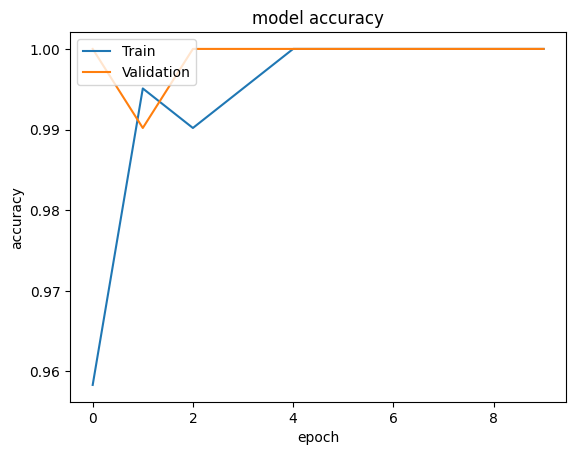

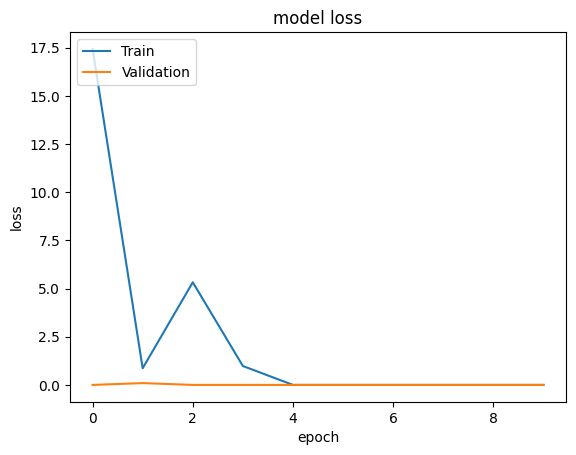

In [ ]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()